<div style="text-align: justify;"><h1 style="text-align: centre !important;">CS649 Big Data Analytics Project</h1>
 <spans style="text-align: right !important;"> 
        <br></span>
<hr><span style="font-size: 1.5em;font-weight: bolder">I.Objective of project:</span><hr>
<ul>
<li><em><u>Predictive Analysis:</u></em> To model a dataset of house rental prices using various machine learning algorithms to predict rental prices depending on multiple explanatory variables that describe the elements of the residential property.<br>  
<u>Exploratory analysis:</u> Summarize the main characteristics and analyze the dependencies between the variables and the rental prices using statistical graphs and visualizations.<br>
<u>Comparative Analysis:</u> Compare the machine learning algorithms and their performance.</li>
<br>
<li><em><u>Dataset description:</u></em> rentalHousing.csv This file contains rental house listings from Craigslist for south eastern regions between San Francisco bay area and San diego. This includes all information regarding the rental listing which includes url of the listing, region of the property, area(sqft.), number of baths and beds, cats and dogs allowed, wheelchair accessibility, electric charging point availability for vehicles, laundry options, smoking permission, description of the property, location (latitude & longitude) and etc. We have about 18300 records consisting of thirteen numerical features and nine categorical features.</li>
<br>
<li><em><u>Tech and libraries:</u></em> We have implemented the project using both pandas and Spark pandas separately. The Spark pandas version runs smoothly on Spark 3.2.1 and Jupyter. You are required to run the second cell in this notebook to set up all the necessary environment variables and import the required libraries. Due to efficiency and lesser running time, we are submitting the pandas version of the project application. For running the pandas version of the project, which is this notebook, we will requrie XGBoostRegressor library to be installed.</li>
 <br>
<li><em><u>Issues and challenges:</u></em>
<ul>
<li>With spark pandas version:<br><ol><li>We had to resolve dtype conflicts and convert our data to numpy ndarray or a pandas dataframe to successfully visualize & fit data into models.</li>
<li>The main issue we faced was memory. The main reason being, the entire RAM was used up and the session times out. We resolved this issue by increasing the value of spark.driver.memory to 15gb in the spark-defaults.conf configuration file.</li>
<li>We need to plot the graphs using pandas DataFrame since Spark does not having functions to plot graphs.</li><ol></li>
<ul>
</li>
</ul> 
    </div>

<hr>
<span style="font-size: 1.5em;font-weight: bolder">II.Exploratory Data Analysis</span>
<hr>
We begin by reading our csv file and convert it to a pandas dataframe. We will also import necessary libraries for both modelling and visualization.<br>
We have <u>thirteen</u> numberical variables( float(3), integer(10)) and <u>nine</u> catgeorical variables(object(9)) in the dataset.




In [1]:
PATH="rental_listing.csv"

In [2]:
import numpy as np
import pandas as pd

#for plotting
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [3]:
rental_listings=pd.read_csv(PATH)

In [5]:
rental_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33085 entries, 0 to 33084
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       33085 non-null  int64  
 1   url                      33085 non-null  object 
 2   region                   33085 non-null  object 
 3   region_url               33085 non-null  object 
 4   price                    33085 non-null  int64  
 5   type                     33085 non-null  object 
 6   sqfeet                   33085 non-null  int64  
 7   beds                     33085 non-null  int64  
 8   baths                    33085 non-null  float64
 9   cats_allowed             33085 non-null  int64  
 10  dogs_allowed             33085 non-null  int64  
 11  smoking_allowed          33085 non-null  int64  
 12  wheelchair_access        33085 non-null  int64  
 13  electric_vehicle_charge  33085 non-null  int64  
 14  comes_furnished       

Let's analyze and list all the counties and their respective rental listing counts. We intend to analyze the trends over a selected region in California and have selected the metropolitan area between San fransisco and San Diego as our main geograhical region in the price analysis. 
<br><br><i>The regions include - San Frasisco Bay area, San Diego, Los Angeles, Bakersfield, Fresno, Stockton, Orange County and Inland Empire(Inland Empire comprises of cities Banning, Beaumont, Blythe , Calimesa, Canyon Lake, Cathedral City, Coachella, Corona, Desert Hot Springs, Eastvale,Hemet, Indian Wells,Indio, Jurupa Valley,Lake Elsinore,La Quinta,Moreno Valley, Menifee,Murrieta,Norco,Palm Desert, Palm Springs,Perris, Rancho Mirage,Riverside, San Jacinto,Temecula, Wildomar,County of Los Angeles,Claremont, Pomona,County of San Bernardino,Adelanto, Angelus Oaks,Apple Valley, Barstow,Big Bear Lake, Bloomington, Chino, Chino Hills, Claremont, Colton, Crestline, Fontana, Grand Terrace, Hesperia, Highland, Joshua Tree, Lake Arrowhead, Loma Linda, Lucerne Valley, Mentone, Montclair, Needles, Ontario, Rancho Cucamonga, Redlands, Rialto, Running Springs, San Bernardino, Twentynine Palms, Upland,Victorville,Wrightwood,Yermo,Yucaipa,Yucca Valley).</i>
<br><br>We have chosen overlapping regions and cities since they are presented as an exclusive count on craigslist.

In [6]:
rental_listings['region'].value_counts()

ventura county      2579
stockton            2571
inland empire       2561
orange county       2388
sacramento          2385
san diego           2357
SF bay area         2327
los angeles         2260
fresno / madera     2195
reno / tahoe        1990
bakersfield         1644
palm springs        1409
modesto             1265
monterey bay        1147
hanford-corcoran     815
santa barbara        628
visalia-tulare       449
san luis obispo      448
merced               269
chico                264
gold country         256
redding              237
yuba-sutter          152
humboldt county      145
santa maria          138
imperial county       92
mendocino county      57
siskiyou county       42
susanville            15
Name: region, dtype: int64

In [7]:
rental_listings = rental_listings.loc[ (rental_listings.region == "bakersfield") | (rental_listings.region=="orange county") |(rental_listings.region=="san diego")| (rental_listings.region=="SF bay area")| (rental_listings.region=="los angeles")| (rental_listings.region=="fresno / madera")| (rental_listings.region=="stockton")| (rental_listings.region=="inland empire")]
rental_listings.head(5)

id                                                url  \
0  7043564175  https://bakersfield.craigslist.org/apa/d/baker...   
1  7041801174  https://bakersfield.craigslist.org/apa/d/baker...   
2  7047098271  https://fresno.craigslist.org/apa/d/fresno-fan...   
3  7046025600  https://fresno.craigslist.org/apa/d/fresno-all...   
5  7043776434  https://bakersfield.craigslist.org/apa/d/wasco...   

            region                          region_url  price       type  \
0      bakersfield  https://bakersfield.craigslist.org    980  apartment   
1      bakersfield  https://bakersfield.craigslist.org    700  apartment   
2  fresno / madera       https://fresno.craigslist.org   1160  apartment   
3  fresno / madera       https://fresno.craigslist.org   1529  apartment   
5      bakersfield  https://bakersfield.craigslist.org   1250      house   

   sqfeet  beds  baths  cats_allowed  ...  wheelchair_access  \
0    1000     2    1.0             0  ...                  0   
1     800     2    1.0             1  ...                  0   
2     794     1    1.0             0  ...                  0   
3    1169     2    2.0             0  ...                  1   
5    1350     3    2.0             0  ...                  0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
0                        0                0  laundry on site          carport   
1                        0                0              NaN              NaN   
2                        0                0              NaN              NaN   
3                        0                0      w/d in unit  attached garage   
5                        0                0      w/d hookups  attached garage   

                                           image_url  \
0  https://images.craigslist.org/00k0k_ejqvoocN8W...   
1  https://images.craigslist.org/00H0H_3PQvYkL9nT...   
2  https://images.craigslist.org/00A0A_2q5ahaZNxT...   
3  https://images.craigslist.org/00F0F_2gCgt0X7DZ...   
5  https://images.craigslist.org/00s0s_binAztZAMu...   

                                         description      lat     long  state  
0  Our BEAUTIFUL apartments provide enough space ...  35.3468 -119.049     ca  
1  New flooring, freshly painted & bathroom has b...  35.3384 -119.063     ca  
2  The Springs Apartments in Fresno, CA Welcome t...  36.8466 -119.775     ca  
3  -- Cascades -- show contact info  Monthly Rent...  36.8716 -119.770     ca  
5  Beautiful house  3 bedroom 2 baths New paint N...  35.5816 -119.346     ca  

[5 rows x 22 columns]

<h4>Does the dataset have any missing values for the feature columns?</h4><br>
We further analyze our data for missing values using a heat map. We found most of the missing values in laundry, parking and location(latitude & longitude) feature columns compared with others. 
Percentage of missing value is as follows:
<table ><tr><th >Feature<th><th>Percentage of missing values <th><tr>
<tr><td> parking_options <td><td> 28 <td><tr>
    <tr><td> laundry_options <td><td> 16 <td><tr>
        <tr><td> latitude <td><td> 3 <td><tr>
            <tr><td> longitude <td><td> 3 <td><tr>
    <table>

[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 68.09375, 'Dataset Column names'),
 Text(69.0, 0.5, 'Data Points')]

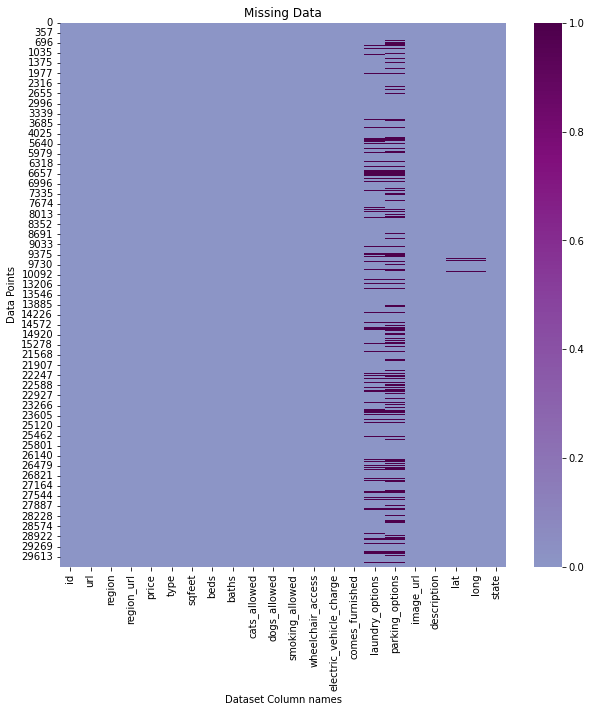

In [8]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rental_listings.isnull(), ax=ax, cmap="BuPu", center=0).set( title = 'Missing Data', xlabel = 'Dataset Column names', ylabel = 'Data Points')

In [9]:
rental_listings.count()

id                         18303
url                        18303
region                     18303
region_url                 18303
price                      18303
type                       18303
sqfeet                     18303
beds                       18303
baths                      18303
cats_allowed               18303
dogs_allowed               18303
smoking_allowed            18303
wheelchair_access          18303
electric_vehicle_charge    18303
comes_furnished            18303
laundry_options            15352
parking_options            13007
image_url                  18303
description                18303
lat                        18244
long                       18244
state                      18303
dtype: int64

In [10]:
rental_listings.isna().mean().sort_values(ascending=False)

parking_options            0.289351
laundry_options            0.161230
long                       0.003224
lat                        0.003224
id                         0.000000
url                        0.000000
description                0.000000
image_url                  0.000000
comes_furnished            0.000000
electric_vehicle_charge    0.000000
wheelchair_access          0.000000
smoking_allowed            0.000000
dogs_allowed               0.000000
cats_allowed               0.000000
baths                      0.000000
beds                       0.000000
sqfeet                     0.000000
type                       0.000000
price                      0.000000
region_url                 0.000000
region                     0.000000
state                      0.000000
dtype: float64

We will plot the comparative bar chart of the number of rental house listings in each of the selected location. We notice that even though Stockton is a city it has a comparable number of listings compared to Inland Empire, which is actually a colleection of counties, towns, cities.<br>
We infer that Stockton has the <b><u>highest number</u></b> of listings of about <b>2571</b> in this region.

<AxesSubplot:>

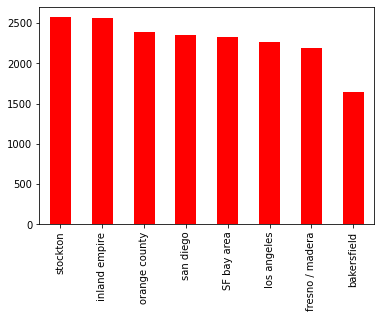

In [11]:
rental_listings.region.value_counts().plot(kind="bar",color="red")

We will analyze the different types of properties that are listed on craigslist for this region with another bar chart. We see that <b>apartment spaces</b> are the most dominant type of listings. We have very few listings for indepedent houses, town houses, duplex spaces and ignorable figures for separately categorized spaces like lofts, in-law suites, cottage and cabin spaces.  

<AxesSubplot:>

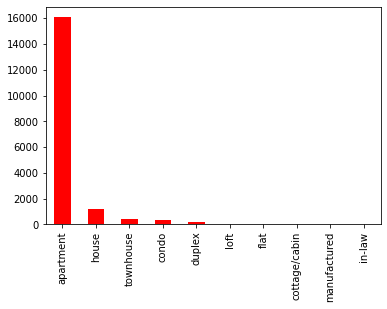

In [12]:
rental_listings.type.value_counts().plot(kind="bar",color="red")

<h4>What is the average rental price for each of these locations?</h4>
<br>
We will analyze the average rental price for each region. The rental price is the lowest in Fresno/Madera & Bakersfield while the highest price is listed in the Inland Empire region. The differential price between these two regions is approximately $9000.

In [13]:
rental_listings.groupby('region')['price'].mean()

region
SF bay area         3112.074774
bakersfield         1158.894769
fresno / madera     1153.198178
inland empire      10169.553690
los angeles         2533.839381
orange county       2179.814489
san diego           2249.726771
stockton            1539.513808
Name: price, dtype: float64

We will store all the features that have missing values for further evaluations later on.

In [14]:
features_with_NA=[features for features in rental_listings.columns if rental_listings[features].isnull().sum() > 0]
print('Number of Features having missing values: ', len(features_with_NA))


Number of Features having missing values:  4


<h4> Is there a relationship between missing values and price?</h4>
<br>
We will check if these missing variables have any impact the housing rental price. We do this by monitoring any difference in rental prices based on the presence/absence of these feature values. 
<br>After carefully noticing the graphs below, we infer that these features do not have <u>much</u> impact on the prices. We see a difference for pricing for features latitude and longitude but since these are geographical features - their presence/absence does not directly influence the price so we will move on to infer that they have a neglible impact on the price. 

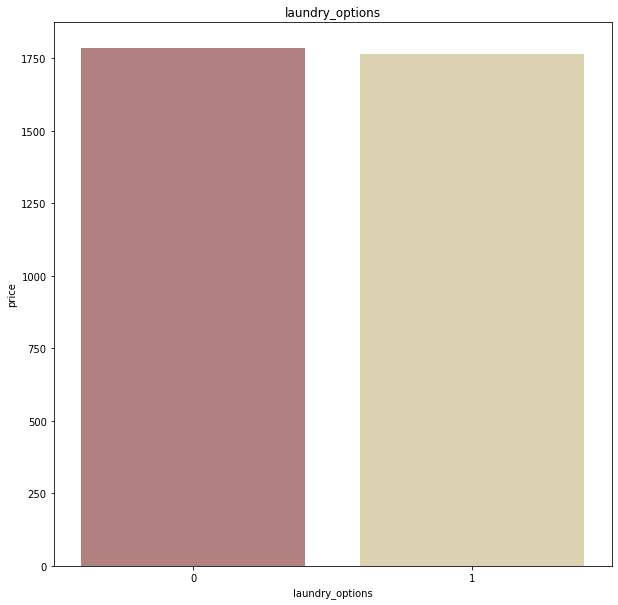

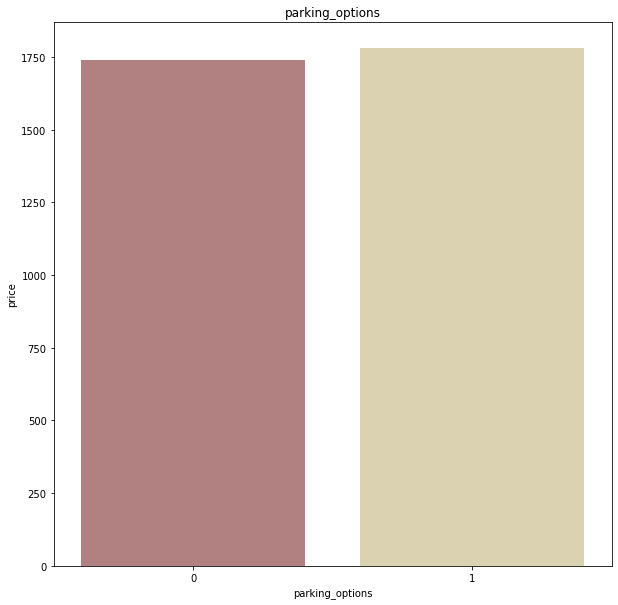

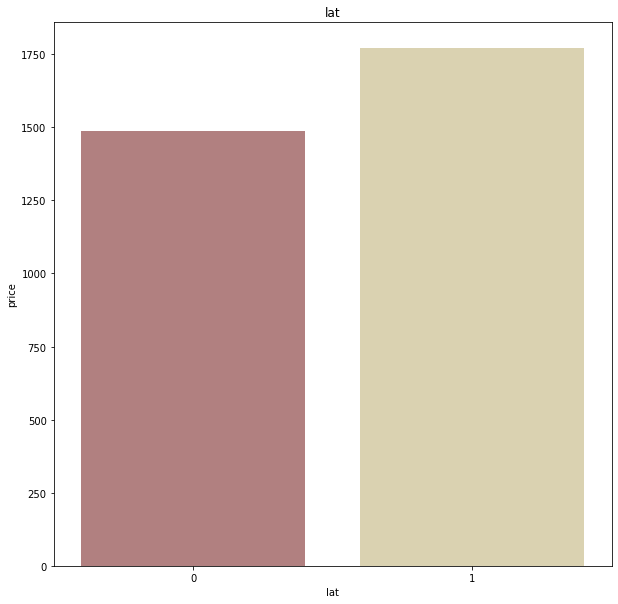

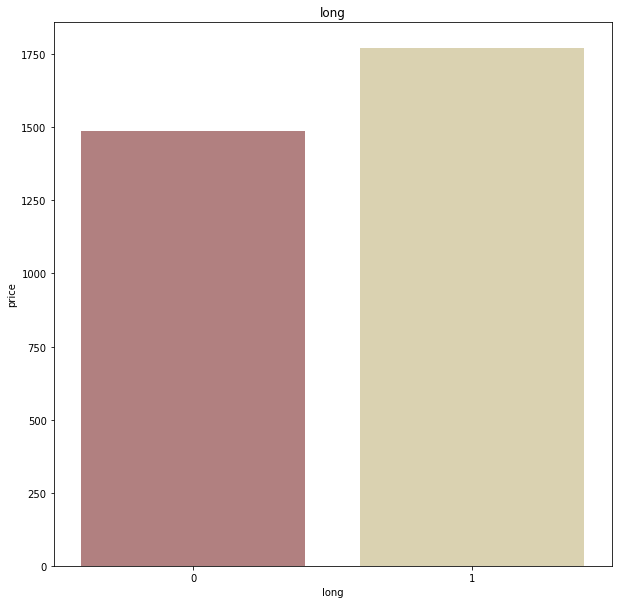

In [15]:
def analyse_null_values(df, var):
    df = rental_listings.copy()
    # let's make a variable that indicates 0 if the observation was missing or 1 otherwise
    df[var]=np.where(df[var].isna(), 0, 1)
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,10))
    sns.barplot(x=grs[var], y=grs['price'],palette="pink")
    plt.title(var)
    plt.show()
    
# let's run the function on each variable with missing data
for var in features_with_NA:
    analyse_null_values(rental_listings, var)

<b>List of categorical variables with missing values<b>

In [16]:
categorical_vars_with_na = [var for var in rental_listings.columns if rental_listings[var].isnull().sum() > 0 and rental_listings[var].dtypes == 'O']
print("Categorical variables with missing values : ",categorical_vars_with_na)
print("Number of categorical variables with missing values : ",len(categorical_vars_with_na))

Categorical variables with missing values :  ['laundry_options', 'parking_options']
Number of categorical variables with missing values :  2


<b>List of numerical variables with missing values</b>

In [17]:
numerical_vars_with_na = [var for var in rental_listings.columns if rental_listings[var].isnull().sum() > 0 and rental_listings[var].dtypes != 'O' ]
print("Numerical variables with missing values",numerical_vars_with_na)
print("Number of numerical variables with missing values",len(numerical_vars_with_na))


Numerical variables with missing values ['lat', 'long']
Number of numerical variables with missing values 2


<b>List of Boolean Variables</b>

In [18]:
boolean_vars = [var for var in rental_listings if rental_listings[var].nunique() == 2]
print("Number of boolean variables",len(boolean_vars))
boolean_vars

Number of boolean variables 6


['cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished']

<b>List of all numerical values</b>

In [19]:
only_numerical_vars = [var for var in rental_listings.columns if rental_listings[var].dtypes != 'O' and var not in boolean_vars]
print('Number of numerical variables: ', len(only_numerical_vars))
only_numerical_vars

Number of numerical variables:  7


['id', 'price', 'sqfeet', 'beds', 'baths', 'lat', 'long']

Inorder to correctly analyze the features and its impact on the prices, we will need to handle all the missing values of numerical and categorical features, so we will clean our data. We will use <b>mode imputation</b> to accommodate the missing values for these features.

We do not requre id, url and image_url fields in our rental_listings as they absolutely no impact on the prices. ---- move this line.

<h4>Is any listing misclassified in our selected region by craigslist?</h4><br>
Let's plot latitude and longitude to verify if the data from craigslist lists the property in the correct locational grid(California) and we do not have any misclassified regional data in our rental_listings. The plot below indicates that lat and long for the dataset ranges from 32-39 degrees north and  to 127-115 degrees west. Google map shows the lat and long values for California is 36.7783° N 41.0007° N, 119.4179° W 123.0484° W. 

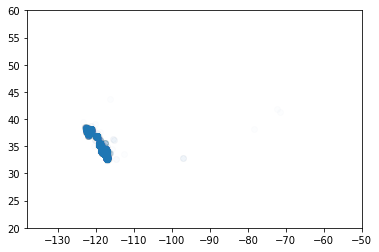

In [20]:
plt.scatter(x=rental_listings['long'], y=rental_listings['lat'],alpha=0.01)
plt.xlim(right=-50)
plt.ylim(bottom=20,top=60)
plt.show()


So we have confirm that our data does not contain any such improper data. 

<b>Do we have any discrete feature values? List them</b>

In [21]:
discrete_vars = [var for var in only_numerical_vars if len(rental_listings[var].unique()) < 13 and var not in ['id', 'price']]
print('Number of discrete variables: ', len(discrete_vars))
discrete_vars

Number of discrete variables:  2


['beds', 'baths']

The number of rooms and bathrooms are the discrete variables. Let's look at their contribution to the house price now.

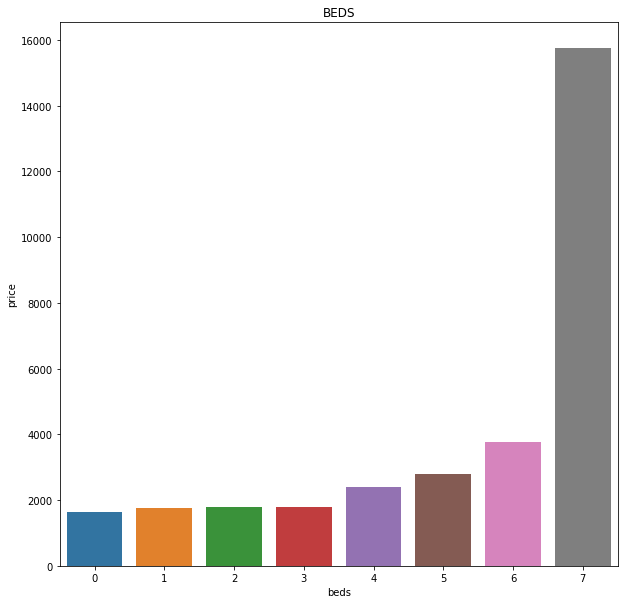

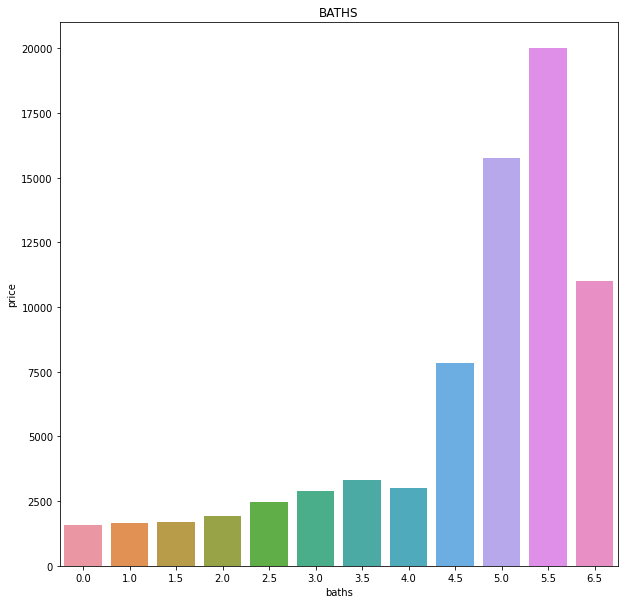

In [22]:
def analyse_discrete(df, var):
    df = rental_listings.copy()
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,10))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var.upper())
    plt.show()
    
    
for var in discrete_vars:
    analyse_discrete(rental_listings, var)

The values of these two variables and the price have a tendency to correlate, although this connection is not necessarily exponential.  
<br>
For example, there is an exponential relationship in the pricing of beds. The greater the number of bedrooms, the higher the price.
<br>
However, in case of baths the link is <u>not exponential</u>. Clearly, some bath numbers, such as 5.5, are associated with higher sale prices, but this is not always the case. To get the most out of this model, we need to be careful about how we build these variables.


Let's find out how the continuous variables are distributed. All variables in our rental_listings that are neither temporal or discrete will be considered continuous variables.
<br>Let's make list of continuous variables

In [23]:
cont_vars = [var for var in only_numerical_vars if var not in discrete_vars+['id']]
print('Number of continuous variables: ', len(cont_vars))
cont_vars

Number of continuous variables:  4


['price', 'sqfeet', 'lat', 'long']

 Let's go ahead and analyse the distributions of these variables

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


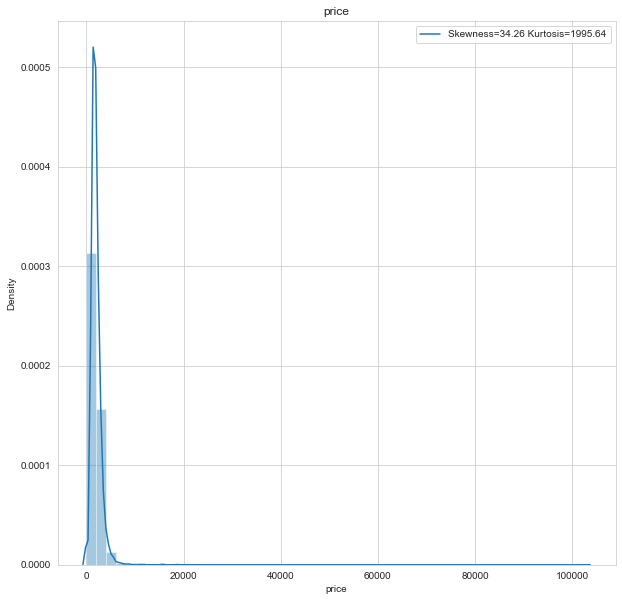

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


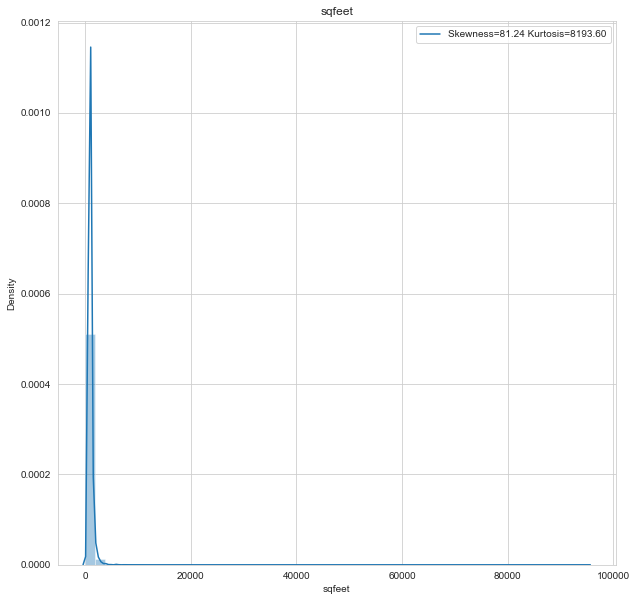

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


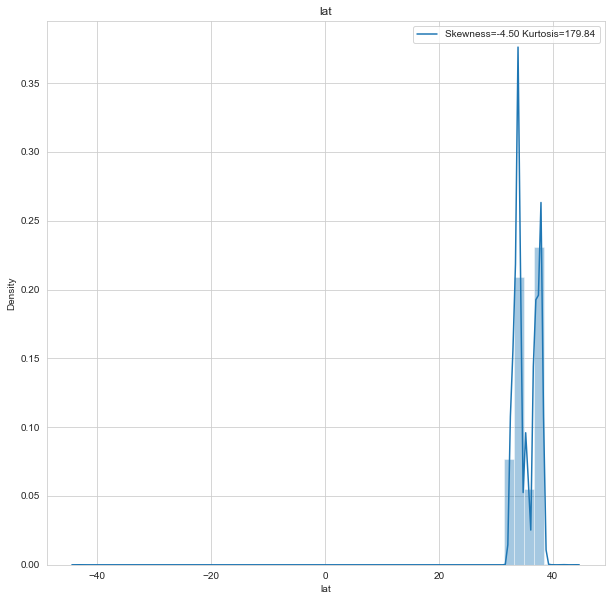

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


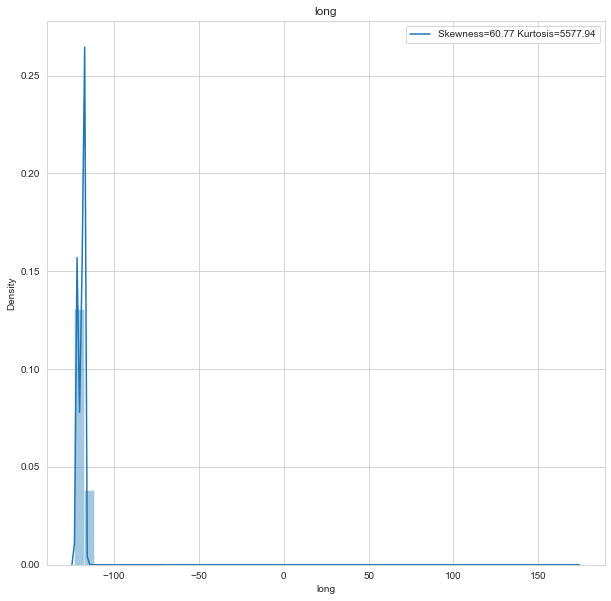

In [24]:
def analyse_continuous(rental_listings, var):
    rental_listings = rental_listings.copy()
    rental_listings = rental_listings.dropna(axis=0)
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.distplot(rental_listings[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            rental_listings[var].skew(), 
            rental_listings[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(rental_listings, var)

The variables are not normally distributed, including the target variable 'price'.
<br>
To maximise performance of our machine learning models, we need to account for non-Gaussian distributions.
<br>
Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:
<br>
We will implement a distribution plot again after a log transformation as below:

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


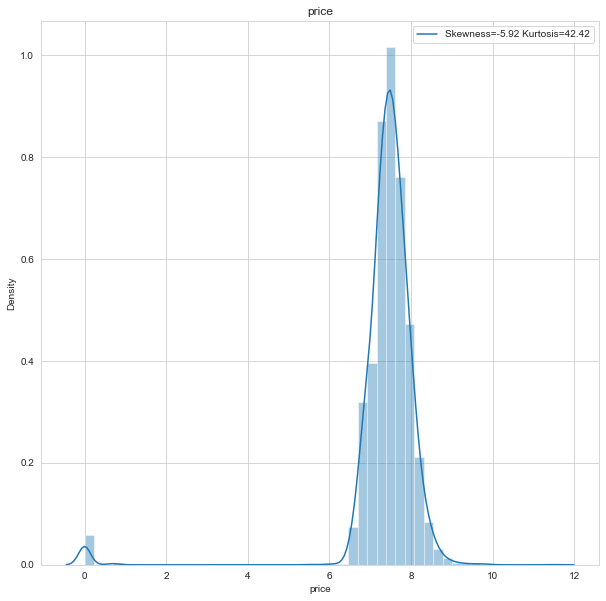

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


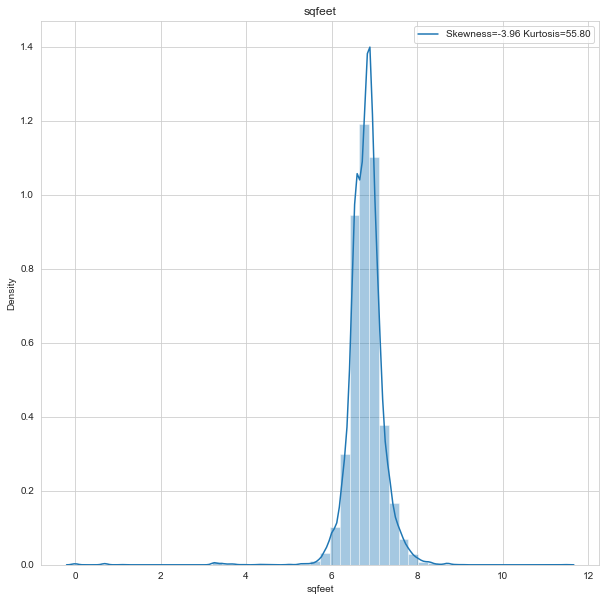

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


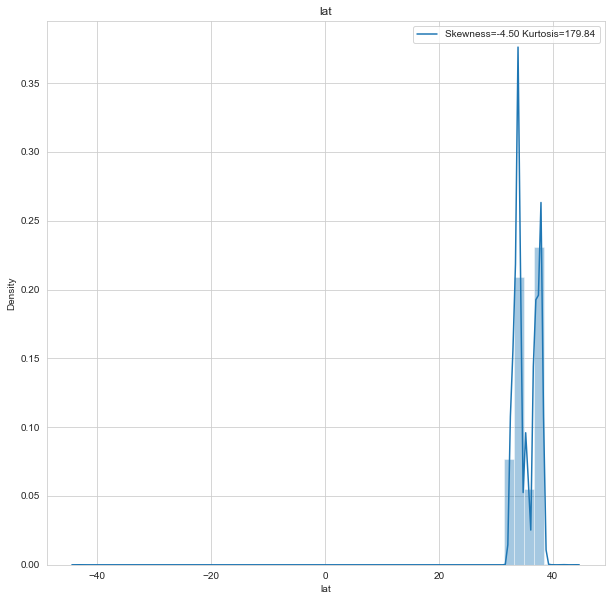

C:\Users\sshete8436\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


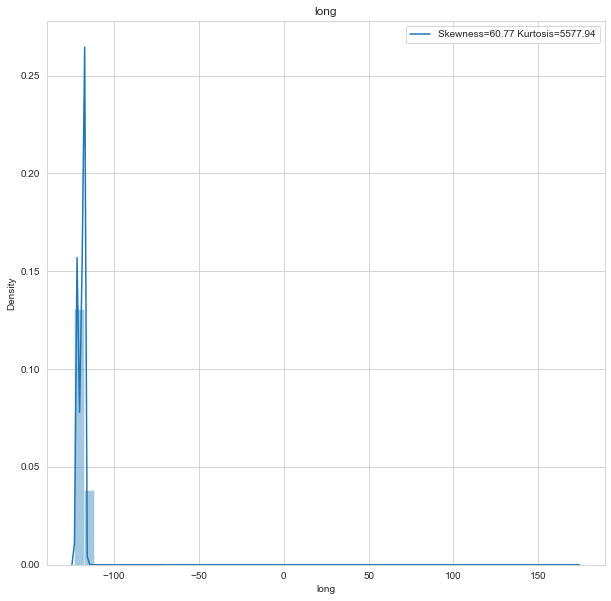

In [25]:
def analyse_transformed_continuous(rental_listings, var):
    rental_listings = rental_listings.copy()
    rental_listings = rental_listings.dropna(axis=0)

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long' or var=='Unnamed: 0':
        pass
    else:
        # log transform the variable
        rental_listings[var] = np.log1p(rental_listings[var])
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.distplot(rental_listings[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            rental_listings[var].skew(), 
            rental_listings[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_transformed_continuous(rental_listings, var)

As we can see,we get a better spread of the values for most features when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

From the previous plots, we observe some non-linear associations between price and the feature variables to which we applied the log transformation, for example 'sqfeet'.

 <b>Do we have any outliers in the features?</b><br>
 Let's make box plots to visualise outliers in the continuous variables. 

In [26]:

def find_outliers(rental_listings, var):
    rental_listings = rental_listings.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        rental_listings[var] = np.log1p(rental_listings[var])
    ax = sns.boxplot(x=rental_listings[var], palette="flag", orient="horizontal")
    plt.title(var)
    plt.ylabel(var)
    plt.show()

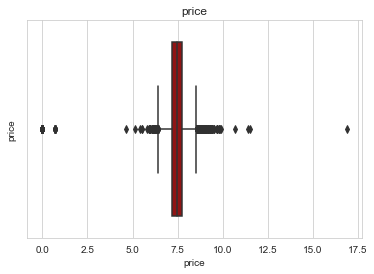

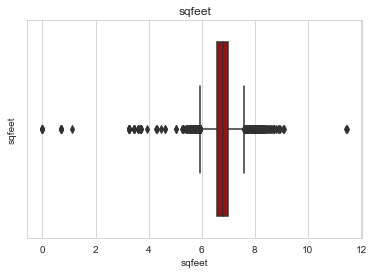

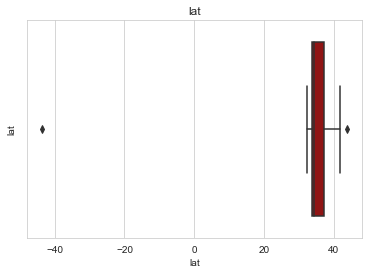

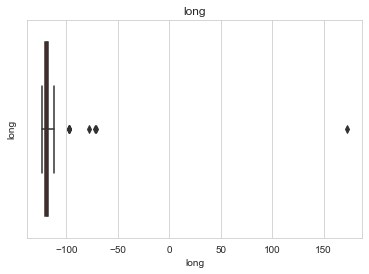

In [27]:
for var in cont_vars:
    find_outliers(rental_listings, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of our  models. We will handle outliers in the following data cleaning step where we will use interquartile ranges to calculate upper and lower bounds and later one utilize it to form more features. 

In [28]:
def out_iqr(rental_listings, column):
    global lower,upper
    q25, q75 = np.quantile(rental_listings[column].to_numpy(), 0.25), np.quantile(rental_listings[column].to_numpy(), 0.75)
    
    # calculate the IQR
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = rental_listings[rental_listings[column] > upper]
    df2 = rental_listings[rental_listings[column] < lower]
    
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [29]:
out_iqr(rental_listings, 'price')

The IQR is 960.0
The lower bound value is -85.0
The upper bound value is 3755.0
Total number of outliers are 868


In [30]:
out_iqr(rental_listings, 'sqfeet')

The IQR is 365.0
The lower bound value is 165.5
The upper bound value is 1625.5
Total number of outliers are 827


In [31]:
out_iqr(rental_listings, 'beds')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 494


In [32]:
out_iqr(rental_listings, 'baths')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 58


<b>Pie chart for analysing type of property and their contribution to the average prices.</b>

In [33]:
grdsp = rental_listings.groupby(["type"])[["price"]].mean().reset_index()
print(grdsp)
fig = px.pie(grdsp,
             values=grdsp['price'].to_numpy(),
             names=grdsp['type'].to_numpy(),
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

            type        price
0      apartment  3258.034543
1          condo  2534.605096
2  cottage/cabin  1840.718750
3         duplex  1928.120000
4           flat  3029.297297
5          house  2658.804647
6         in-law  2335.681818
7           loft  2093.350000
8   manufactured  1423.545455
9      townhouse  2333.344907


We see that the majority of the houses are of type apartment with around 14% contribution to the average of prices.
The mean price for the type apartment is around 3258.

<b>Do we see any correlation between the explanatory variables and the price?</b><br>
We will use a Correlation Heatmap to analyze this

<AxesSubplot:>

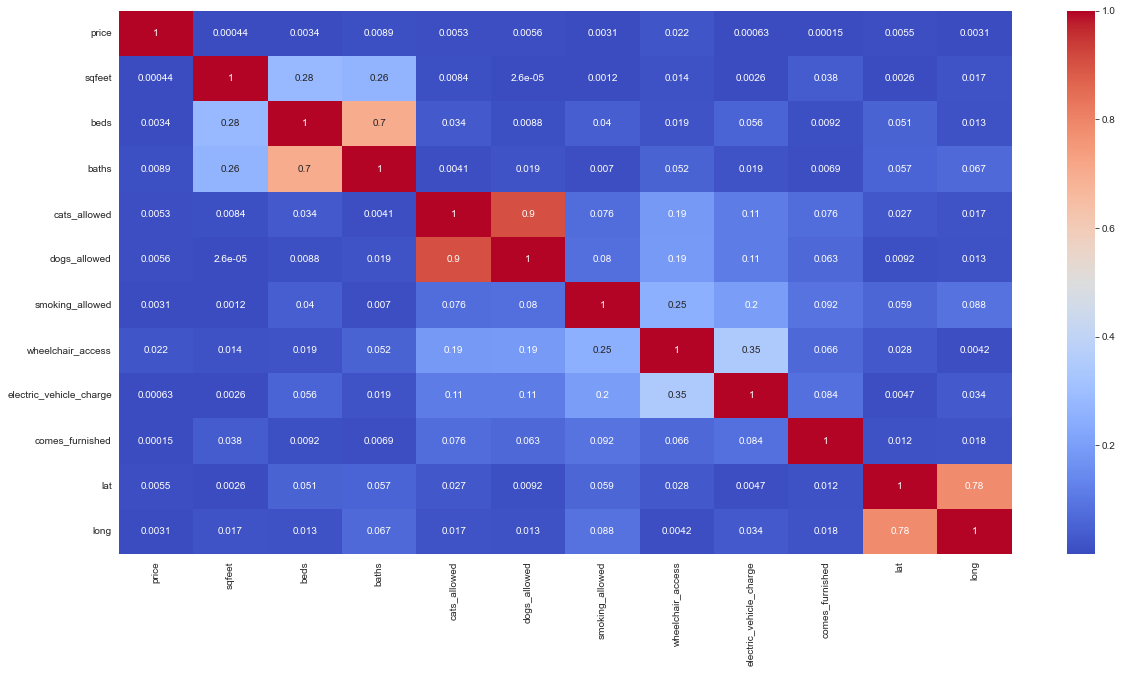

In [34]:
df=rental_listings.copy()
df=df.drop(columns="id")
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True, cmap='coolwarm')


<b>After carefully analyzing the heat map, we become aware that the order of most influencing relevant features on the rental price is baths,beds, cats and dogs allowance and wheelcahir accessibilty.</b>

Since the some of the values taken up by the 'baths' feature included decimal values, we will be rounding off number of baths to integer value

In [35]:
rental_listings['baths']=np.ceil(rental_listings['baths']).astype(int)

We will employ mode imputation method on categorical features since we had most of the missing values for features associated with laundry and parking. 

In [36]:
def impute_missing_categorical_values(df, var, modeof):
    return df.groupby(modeof)[var].transform(lambda x: x.fillna(x.mode()[0]))

In [37]:
rental_listings['laundry_options'] = impute_missing_categorical_values(rental_listings, 'laundry_options', 'type')
rental_listings['parking_options'] = impute_missing_categorical_values(rental_listings, 'parking_options', 'type')


In [38]:
rental_listings = rental_listings.dropna(subset=["state", "description"],axis=0)

We will not miss out any improper data so we will mode impute numerical features. 

In [39]:
def impute_missing_numerical_values(df, var, meanof):
    return df.groupby(meanof)[var].transform(lambda x: x.fillna(x.mode()[0]))

In [40]:
rental_listings["lat"] = impute_missing_numerical_values(rental_listings, "lat", "region")
rental_listings["long"] = impute_missing_numerical_values(rental_listings, "long", "region")

In EDA, we  will remove any outliers according to the upper and lower bound of its interquartile range( calculated earlier)

In [41]:
price_upper, price_lower = 3755, 1
sqfeet_upper, sqfeet_lower = 1625, 1
beds_upper, beds_lower = 3, 1
baths_upper, baths_lower = 3, 1

In [42]:
rental_listings = rental_listings[(rental_listings['price'] <= price_upper) & (rental_listings['price'] >= price_lower)]
rental_listings = rental_listings[(rental_listings['sqfeet'] <= sqfeet_upper) & (rental_listings['sqfeet'] >= sqfeet_lower)]
rental_listings = rental_listings[(rental_listings['beds'] <= beds_upper) & (rental_listings['beds'] >= beds_lower)]
rental_listings = rental_listings[(rental_listings['baths'] <= baths_upper) & (rental_listings['baths'] >= baths_lower)]

To add more to our analysis, we will examine the Description column. We examine for the presence of amenities related keywords in this column. We assume no owner or poster would mention a facility or amenity unless present in their description of the rental property. 

In [43]:
rental_listings['beds_per_sqfeet'] = rental_listings['beds'] / rental_listings['sqfeet']
rental_listings['baths_per_beds'] = rental_listings['baths'] / rental_listings['beds']
rental_listings['has_pool'] = rental_listings['description'].apply(lambda x: 1 if 'pool' in x.lower() or 'swimming' in x.lower() else 0)
rental_listings['gym_nearby'] = rental_listings['description'].apply(lambda x: 1 if 'gym' in x.lower() or 'fitness' in x.lower() else 0)
rental_listings['wifi_facilities'] = rental_listings['description'].apply(lambda x: 1 if 'wifi' in x.lower() or 'wi-fi' in x.lower() else 0)
rental_listings['dining_nearby'] = rental_listings['description'].apply(lambda x: 1 if 'dining' in x.lower() else 0)
rental_listings['has_grill'] = rental_listings['description'].apply(lambda x: 1 if 'grill' in x.lower() or 'grilling' in x.lower() else 0)
rental_listings['has_fireplace'] = rental_listings['description'].apply(lambda x: 1 if 'fireplace' in x.lower() or 'fire pits' in x.lower() else 0)
rental_listings['school/clg_nearby'] = rental_listings['description'].apply(lambda x: 1 if 'school' in x.lower() or 'college' in x.lower() else 0)
rental_listings['valet_service'] = rental_listings['description'].apply(lambda x: 1 if 'valet' in x.lower() else 0)
rental_listings['shopping_nearby'] = rental_listings['description'].apply(lambda x: 1 if 'shopping' in x.lower() else 0)
rental_listings['sports_playground'] = rental_listings['description'].apply(lambda x: 1 if 'sport' in x.lower()  or 'sports' in x.lower() or 'tennis' in x.lower() or 'soccer' in x.lower()  or 'soccers' in x.lower() or 'court' in x.lower() else 0)


<AxesSubplot:>

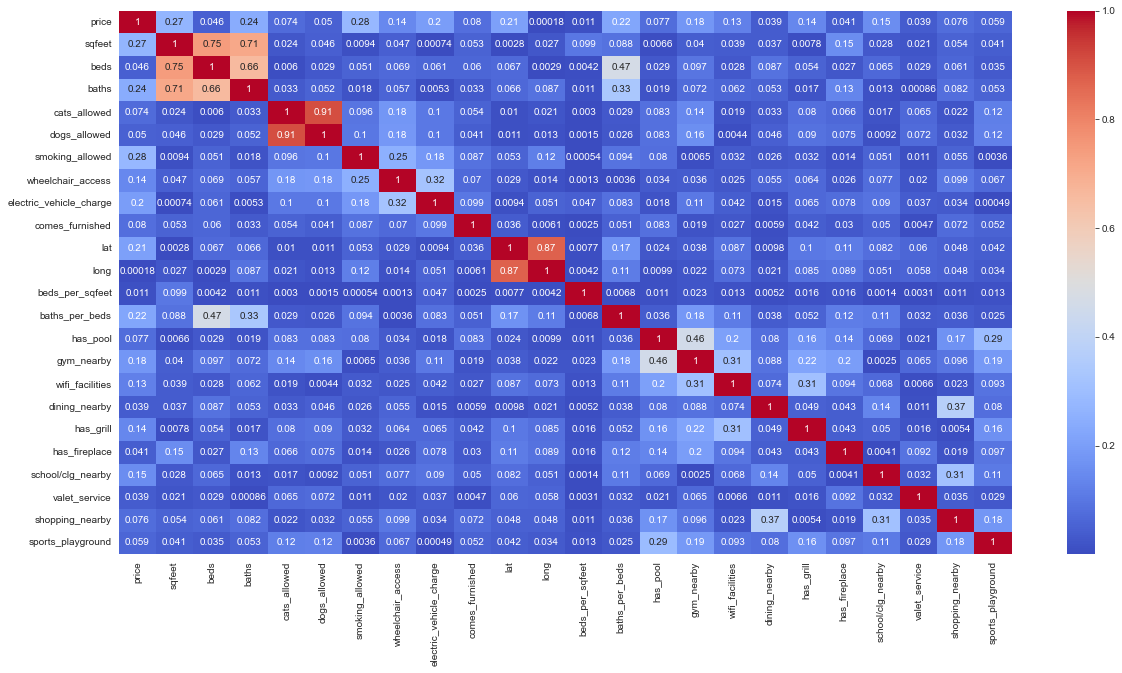

In [44]:
updated_df=rental_listings.copy()
updated_df=updated_df.drop(columns="id")
plt.figure(figsize=(20, 10))
sns.heatmap(updated_df.corr().abs(), annot=True, cmap='coolwarm')

<b>After carefully analyzing the heat map with the added features that we calculated above, we become aware that the order of most influencing relevant features on the rental price is the region(expected), laundry availabilities, smoking allowance, bath per bedroom, parking availabilities, 
the area of the residence(sqfeet), gym options and presence of school or colleges nearby.<b>

Numerical Variable Transformation

We will log transform the positive numerical variables in order to get a more Gaussian-like distribution. This tends to help Linear machine learning models.


In [45]:
for var in ['price','sqfeet','baths_per_beds','beds_per_sqfeet']:
    rental_listings[var] = np.log(rental_listings[var])

In [46]:
categorical_vars_for_encoding = ['region', 'type', 'laundry_options', 'parking_options']

Encoding of categorical variables

Next, we need to transform the strings of the categorical variables into numbers. We will do it so that we capture the monotonic relationship between the label and the target.

In [47]:
def replace_categorical_values(rental_listings, var, target):

    
    ordered_labels = rental_listings.groupby([var])[target].mean().sort_values().index.to_numpy()

    
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

   
    rental_listings[var] = rental_listings[var].map(ordinal_label)

In [48]:
for var in categorical_vars_for_encoding:
    replace_categorical_values(rental_listings, var, 'price')

In [49]:
rental_listings.dtypes.value_counts()
rental_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15619 entries, 0 to 29957
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15619 non-null  int64  
 1   url                      15619 non-null  object 
 2   region                   15619 non-null  int64  
 3   region_url               15619 non-null  object 
 4   price                    15619 non-null  float64
 5   type                     15619 non-null  int64  
 6   sqfeet                   15619 non-null  float64
 7   beds                     15619 non-null  int64  
 8   baths                    15619 non-null  int32  
 9   cats_allowed             15619 non-null  int64  
 10  dogs_allowed             15619 non-null  int64  
 11  smoking_allowed          15619 non-null  int64  
 12  wheelchair_access        15619 non-null  int64  
 13  electric_vehicle_charge  15619 non-null  int64  
 14  comes_furnished       

Now, with a total of 29 numerical features and 5 categorical features we have completed cleaning the dataset rental_listings and read to model and predict. 

<span style="font-size: 1.5em;font-weight: bolder">III. Data modelling</span>
<br><br>
We will employ seven machine learning modelling alogorithms to train, test and predict the housing rental prices using 
the cleaned data 

In [50]:
features = ['region', 'price', 'type', 'sqfeet', 'smoking_allowed', 'wheelchair_access', 
            'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options','lat', 'long','beds_per_sqfeet', 'baths_per_beds', 'has_pool', 
             'gym_nearby', 'wifi_facilities', 'dining_nearby','has_grill','has_fireplace','school/clg_nearby','valet_service','shopping_nearby','sports_playground']

listings = rental_listings[features].copy()
listings.head()

region     price  type    sqfeet  smoking_allowed  wheelchair_access  \
0       0  6.887553     4  6.907755                1                  0   
1       0  6.551080     4  6.684612                1                  0   
2       1  7.056175     4  6.677083                1                  0   
3       1  7.332369     4  7.063904                0                  1   
5       0  7.130899     3  7.207860                0                  0   

   electric_vehicle_charge  comes_furnished  laundry_options  parking_options  \
0                        0                0                1                0   
1                        0                0                4                0   
2                        0                0                4                0   
3                        0                0                4                3   
5                        0                0                0                3   

   ...  has_pool  gym_nearby  wifi_facilities  dining_nearby  has_grill  \
0  ...         1           0                0              1          0   
1  ...         0           0                0              0          0   
2  ...         1           1                0              0          0   
3  ...         1           1                1              1          0   
5  ...         0           0                0              0          0   

   has_fireplace  school/clg_nearby  valet_service  shopping_nearby  \
0              0                  1              0                1   
1              0                  0              0                0   
2              1                  1              0                0   
3              1                  1              0                0   
5              0                  0              0                0   

   sports_playground  
0                  1  
1                  0  
2                  0  
3                  1  
5                  0  

[5 rows x 24 columns]

In [51]:
for feature in features:
    listings[feature] = listings[feature].astype(np.float64)

<span style="font-size: 1em;font-weight: bold">I. Linear Regression Model</span><br>

A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.

In [52]:
input_features = listings.drop('price',axis=1)
price = listings['price']

In [53]:
input_train, input_test, output_train, output_test = train_test_split(input_features,price,test_size=0.30,random_state=10)

In [54]:
price = listings['price']
features = listings.drop(['price'], axis=1)

In [55]:
input_train, input_test, output_train, output_test = train_test_split(features, price, test_size=0.33, random_state=101)

We are feature scaling in order to bring every feature in the same footing without any upfront importance. We will be doing this in both Linear and Random Forest regression models.

In [56]:
scaled_data = StandardScaler()

scaled_input_train = scaled_data.fit_transform(input_train)
scaled_input_test = scaled_data.fit_transform(input_test)
scaled_output_train = output_train
scaled_output_test = output_test

In [57]:
model = LinearRegression()
model.fit(input_train,output_train)

scaled_model = LinearRegression()
scaled_model.fit(scaled_input_train,scaled_output_train)

LinearRegression()

In [58]:
pred_model = model.predict(input_test)
pred_model_scaled = scaled_model.predict(scaled_input_test)

In [59]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, pred_model))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, pred_model)))
print('R2_Score: ', metrics.r2_score(output_test, pred_model))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(scaled_output_test, pred_model_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(scaled_output_test, pred_model_scaled)))
print('R2_Score: ', metrics.r2_score(scaled_output_test, pred_model_scaled))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(pred_model_scaled), 'Actual_Rent': np.exp(scaled_output_test)})

Linear Regression Performance:

all features, No scaling:
MAE: 0.14679060239464595
RMSE: 0.26078668109834124
R2_Score:  0.5724165999812041

all features, with scaling:
MAE: 0.1462363814505083
RMSE: 0.2609357116343548
R2_Score:  0.5719277622018868


MAE - Mean Absolute Error
RMSE - Root mean squared error
R2_Score - R-squared Score

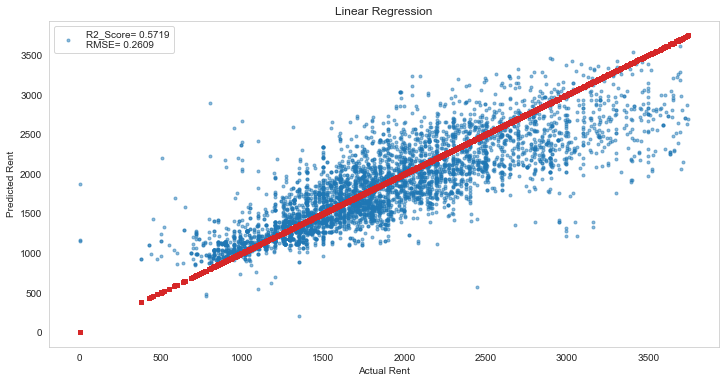

In [60]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(scaled_output_test, pred_model_scaled), 
                np.sqrt(metrics.mean_squared_error(scaled_output_test, pred_model_scaled)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

<span style="font-size: 1em;font-weight: bold">II. Random Forest Model</span><br>
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [61]:
Random_forest_model = RandomForestRegressor(random_state=101, n_estimators=200)
Random_forest_model_scaled = RandomForestRegressor(random_state=101, n_estimators=200)

Random_forest_model.fit(input_train, output_train)
Random_forest_model_scaled.fit(scaled_input_train, scaled_output_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [62]:
RF_pred = Random_forest_model.predict(input_test)
RF_pred_scaled = Random_forest_model_scaled.predict(scaled_input_test)

Random Forest Performance:

All features, No scaling:
MAE: 0.05961993271741846
RMSE: 0.23510751284991085
R2_Score:  0.6524774133470637

All features, with scaling:
MAE: 0.10141750235896323
RMSE: 0.2461263816434984
R2_Score:  0.6191391293690331


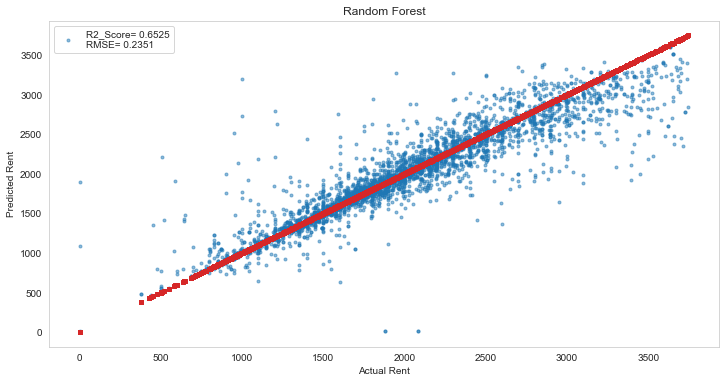

In [63]:
print('Random Forest Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, RF_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, RF_pred)))
print('R2_Score: ', metrics.r2_score(output_test, RF_pred))

print('\nAll features, with scaling:')
print('MAE:', metrics.mean_absolute_error(scaled_output_test, RF_pred_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(scaled_output_test, RF_pred_scaled)))
print('R2_Score: ', metrics.r2_score(scaled_output_test, RF_pred_scaled))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(RF_pred), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, RF_pred), 
                np.sqrt(metrics.mean_squared_error(output_test, RF_pred)))
           ],
           loc='best')
plt.title('Random Forest')
plt.grid()
plt.show()

<span style="font-size: 1em;font-weight: bold">III. Gradient Boosting Model</span><br>

Image result for gradient boosting regressor
Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. 

In [64]:
Gradient_boost = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, 
                                 min_samples_leaf=1, max_depth=3, subsample=1.0, max_features= None, 
                                 random_state=101)

Gradient_boost.fit(input_train, output_train)

GradientBoostingRegressor(random_state=101)

In [65]:
Gradient_boost_pred = Gradient_boost.predict(input_test)


Gradiant Boosting Performance:

All features, No scaling:
MAE: 0.10413295056003281
RMSE: 0.2214828486144298
R2_Score:  0.6915887419813886


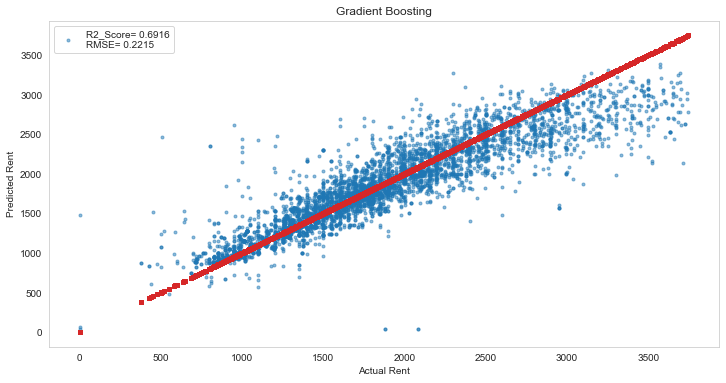

In [66]:
print('Gradiant Boosting Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, Gradient_boost_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, Gradient_boost_pred)))
print('R2_Score: ', metrics.r2_score(output_test, Gradient_boost_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(Gradient_boost_pred), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, Gradient_boost_pred), 
                np.sqrt(metrics.mean_squared_error(output_test, Gradient_boost_pred)))
           ],
           loc='best')
plt.title('Gradient Boosting')
plt.grid()
plt.show()

<span style="font-size: 1em;font-weight: bold">IV. XGBoost Regressor Model</span><br>
XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling. 

In [67]:
xg_boost = XGBRegressor(learning_rate=0.1, n_estimators=100, 
                    min_samples_split=2, min_samples_leaf=1, 
                    max_depth=3, subsample=1.0, random_state=101)

xg_boost.fit(input_train, output_train)

[20:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             min_samples_leaf=1, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=101, ...)

In [68]:
xg_boost_pred = xg_boost.predict(input_test)


XgBoost Performance:

All features, No scaling:
MAE: 0.1031541992419663
RMSE: 0.2257087733111184
R2_Score:  0.679707401703584


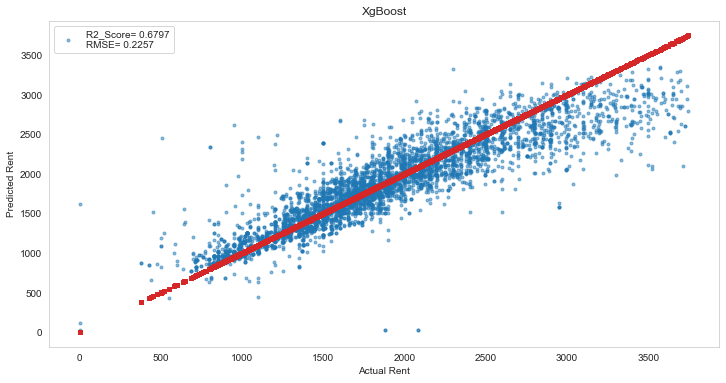

In [69]:
print('XgBoost Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, xg_boost_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, xg_boost_pred)))
print('R2_Score: ', metrics.r2_score(output_test, xg_boost_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(xg_boost_pred), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, xg_boost_pred), 
                np.sqrt(metrics.mean_squared_error(output_test, xg_boost_pred)))
           ],
           loc='best')
plt.title('XgBoost')
plt.grid()
plt.show()

<span style="font-size: 1em;font-weight: bold">V. Decision Tree Regressor Model</span><br>
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Decision Tree Performance:

All features, No scaling:
MAE: 0.06978371655914575
RMSE: 0.25626323321113004
R2_Score:  0.5871211616653289


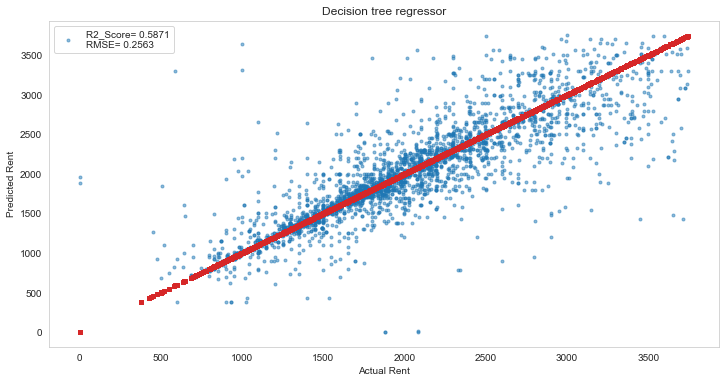

In [70]:
Dtree_model = DecisionTreeRegressor(random_state=1)
Dtree_model.fit(input_train, output_train)
DecisionTreeRegressor(random_state=1)
Dtree_model_predicted = Dtree_model.predict(input_test)
Dtree_model_score = Dtree_model.score(input_test, output_test)
#Dtree_model_score

print('Decision Tree Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, Dtree_model_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, Dtree_model_predicted)))
print('R2_Score: ', metrics.r2_score(output_test, Dtree_model_predicted))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(Dtree_model_predicted), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, Dtree_model_predicted), 
                np.sqrt(metrics.mean_squared_error(output_test, Dtree_model_predicted)))
           ],
           loc='best')
plt.title('Decision tree regressor')
plt.grid()
plt.show()


<span style="font-size: 1em;font-weight: bold">VI. Bagging Regressor Model</span><br>
A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

Bagging Regressor Performance:

All features, No scaling:
MAE: 0.06340737965246067
RMSE: 0.24435343606751167
R2_Score:  0.6246063495893548


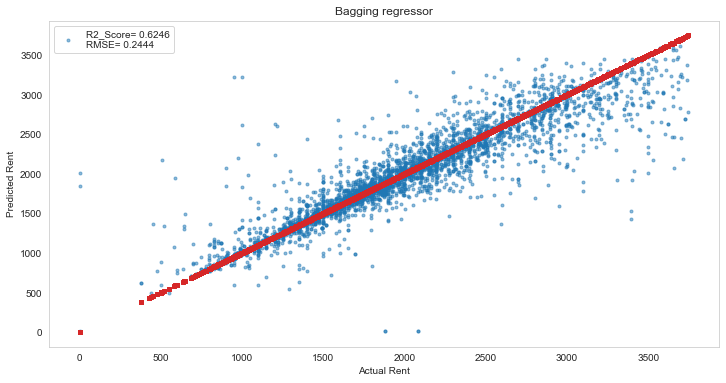

In [71]:

BGR_model = BaggingRegressor()
BGR_model.fit(input_train, output_train)
BGR_model_predicted = BGR_model.predict(input_test)
BGR_model_score = BGR_model.score(input_test, output_test)

print('Bagging Regressor Performance:')

print('\nAll features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, BGR_model_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, BGR_model_predicted)))
print('R2_Score: ', metrics.r2_score(output_test, BGR_model_predicted))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(BGR_model_predicted), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, BGR_model_predicted), 
                np.sqrt(metrics.mean_squared_error(output_test, BGR_model_predicted)))
           ],
           loc='best')
plt.title('Bagging regressor')
plt.grid()
plt.show()


<span style="font-size: 1em;font-weight: bold">VII. ADABoost Regressor Model</span><br>
An AdaBoost [1] regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

ADB Regressor Performance:

all features, No scaling:
MAE: 0.19191200214082105
RMSE: 0.30179780591838556
R2_Score:  0.4273593448659616


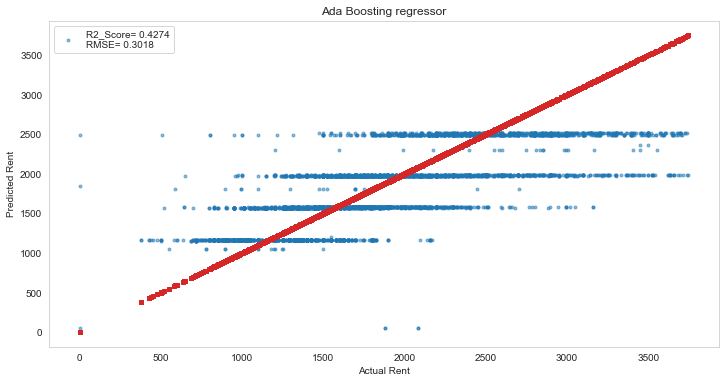

In [72]:
ADB_model = AdaBoostRegressor()
ADB_model.fit(input_train, output_train)
ADB_model_predicted = ADB_model.predict(input_test)
ADB_model_score = ADB_model.score(input_test, output_test)


print('ADB Regressor Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(output_test, ADB_model_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(output_test, ADB_model_predicted)))
print('R2_Score: ', metrics.r2_score(output_test, ADB_model_predicted))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(ADB_model_predicted), 'Actual_Rent': np.exp(output_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:blue', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:red', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(output_test, ADB_model_predicted), 
                np.sqrt(metrics.mean_squared_error(output_test, ADB_model_predicted)))
           ],
           loc='best')
plt.title('Ada Boosting regressor')
plt.grid()
plt.show()



<span style="font-size: 2rem;font-weight:bolder;">Conclusion</span>
<br><br>
In this project, we used housing rental dataset to build a rent predictor for houses listed in the California metropolitan region. Seven different learning regressors (Linear Regression, Random Forest, Gradiant Boosting, XgBoost, Decision Tree, Bagging Regressor and ADA Boost Regressor) were tested, and we have acheived the best prediction performance using Bagging Regressor, followed by Random forest regressor while Linear Regression, acheived the worst performance of all.

The best prediction performance acheived using Gradient Boosting regressor, using all relevant features in the dataset, and resulted in the following metrics:

<ul><li>MAE: 0.059447402449788765</li>
<li>RMSE: 0.2046128374410682</li>
<li>R2_Score:  0.6907235671322401</li></ul>
    
<br>After assessing the results of exploratory data analysis We infer that the  most influencing features on the rental price is the region, laundry availabilities, smoking allowance, bath per bedroom, parking availabilities, 
the area of the residence(sqfeet), gym options and presence of school or colleges nearby.